In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from embedding_evaluation import EmbeddingEvaluation

# Evaluation of the Embedding
## Intro
#### Methods
- Jaccard Distance vs Euclidean Distance
- head + tail embedding vs tail embedding
#### Evaluation:
- 3 Neighbours vs 5 Neighbours
## Ordered
#### Step 1 - Generation of the SubKnowledge Graphs

In [38]:
# not prop
emb_eval_j = EmbeddingEvaluation("jaccard", True, path='config_use_head.json')
emb_eval_j.generate_rating_param_sub_kg()
emb_eval_e = EmbeddingEvaluation("euclidean", True, path='config_use_head.json')
emb_eval_e.generate_rating_param_sub_kg()

# prop
emb_eval_j_prop = EmbeddingEvaluation("jaccard", True, path='config_use_head.json')
emb_eval_j_prop.generate_rating_param_sub_kg_prop()
emb_eval_e_prop = EmbeddingEvaluation("euclidean", True, path='config_use_head.json')
emb_eval_e_prop.generate_rating_param_sub_kg_prop()

#### Step 2 - Calculation of the Equalities between parameter matches and embeddings

re -> rating equality, ed -> embedding

In [39]:
re_jac_3, re_jac_3_val, ed_jac_3, ed_jac_3_val = emb_eval_j.calculate_sub_kg_equality('euclidean', 3)
re_jac_5, re_jac_5_val, ed_jac_5, ed_jac_5_val = emb_eval_j.calculate_sub_kg_equality('euclidean', 5)
re_euc_3, re_euc_3_val, ed_euc_3, ed_euc_3_val = emb_eval_e.calculate_sub_kg_equality('euclidean', 3)
re_euc_5, re_euc_5_val, ed_euc_5, ed_euc_5_val = emb_eval_e.calculate_sub_kg_equality('euclidean', 5)

re_jac_3_prop, re_jac_3_val_prop, ed_jac_3_prop, ed_jac_3_val_prop = emb_eval_j_prop.calculate_sub_kg_equality('euclidean', 3)
re_jac_5_prop, re_jac_5_val_prop, ed_jac_5_prop, ed_jac_5_val_prop = emb_eval_j_prop.calculate_sub_kg_equality('euclidean', 5)
re_euc_3_prop, re_euc_3_val_prop, ed_euc_3_prop, ed_euc_3_val_prop = emb_eval_e_prop.calculate_sub_kg_equality('euclidean', 3)
re_euc_5_prop, re_euc_5_val_prop, ed_euc_5_prop, ed_euc_5_val_prop = emb_eval_e_prop.calculate_sub_kg_equality('euclidean', 5)

100%|██████████| 51/51 [02:17<00:00,  2.70s/it]


In [40]:
# print(re_jac_3.to_latex())
re_jac_3

,0,1,2
stringing,poor_bridging,blobs,warping
line_misalignment,over_extrusion,layer_separation,under_extrusion
gaps,layer_separation,under_extrusion,over_extrusion
layer_separation,over_extrusion,layer_misalignment,burning
over_extrusion,layer_separation,line_misalignment,layer_misalignment
poor_bridging,stringing,blobs,warping
layer_misalignment,burning,layer_separation,under_extrusion
burning,layer_misalignment,layer_separation,under_extrusion
blobs,stringing,poor_bridging,warping
under_extrusion,layer_misalignment,burning,layer_separation


In [41]:
re_jac_3_val

,0,1,2
stringing,28,26,23
line_misalignment,29,28,26
gaps,27,27,26
layer_separation,31,31,31
over_extrusion,31,29,28
poor_bridging,28,24,21
layer_misalignment,34,31,31
burning,34,31,31
blobs,26,24,23
under_extrusion,31,31,30


#### Step 3 - Get number of matches

In [42]:
# Not Propagated
# ORDERED
# jaccard distance
num_match_ord_euc_3 = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_3, ed_euc_3)
num_match_ord_euc_5 = emb_eval_e.get_ord_diff_kg_and_emb(re_euc_5, ed_euc_5)
# euclidean distance
num_match_ord_jac_3 = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_3, ed_jac_3)
num_match_ord_jac_5 = emb_eval_j.get_ord_diff_kg_and_emb(re_jac_5, ed_jac_5)

# UNORDERED
# jaccard distance
num_match_urd_euc_3 = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_3, ed_euc_3)
num_match_urd_euc_5 = emb_eval_e.get_unord_diff_kg_and_emb(re_euc_5, ed_euc_5)
# euclidean distance
num_match_urd_jac_3 = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_3, ed_jac_3)
num_match_urd_jac_5 = emb_eval_j.get_unord_diff_kg_and_emb(re_jac_5, ed_jac_5)

# Propagated
# ORDERED
# jaccard distance
num_match_ord_euc_3_prop = emb_eval_e_prop.get_ord_diff_kg_and_emb(re_euc_3_prop, ed_euc_3_prop)
num_match_ord_euc_5_prop = emb_eval_e_prop.get_ord_diff_kg_and_emb(re_euc_5_prop, ed_euc_5_prop)
# euclidean distance
num_match_ord_jac_3_prop = emb_eval_j_prop.get_ord_diff_kg_and_emb(re_jac_3_prop, ed_jac_3_prop)
num_match_ord_jac_5_prop = emb_eval_j_prop.get_ord_diff_kg_and_emb(re_jac_5_prop, ed_jac_5_prop)

# UNORDERED
# jaccard distance
num_match_urd_euc_3_prop = emb_eval_e_prop.get_unord_diff_kg_and_emb(re_euc_3_prop, ed_euc_3_prop)
num_match_urd_euc_5_prop = emb_eval_e_prop.get_unord_diff_kg_and_emb(re_euc_5_prop, ed_euc_5_prop)
# euclidean distance
num_match_urd_jac_3_prop = emb_eval_j_prop.get_unord_diff_kg_and_emb(re_jac_3_prop, ed_jac_3_prop)
num_match_urd_jac_5_prop = emb_eval_j_prop.get_unord_diff_kg_and_emb(re_jac_5_prop, ed_jac_5_prop)

In [43]:
# Not Propagated
# ORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_ord_3_head = pd.concat([num_match_ord_euc_3, num_match_ord_jac_3], axis=1)
num_match_ord_3_head.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_ord_5_head = pd.concat([num_match_ord_euc_5, num_match_ord_jac_5], axis=1)
num_match_ord_5_head.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# UNORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_urd_3_head = pd.concat([num_match_urd_euc_3, num_match_urd_jac_3], axis=1)
num_match_urd_3_head.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_urd_5_head = pd.concat([num_match_urd_euc_5, num_match_urd_jac_5], axis=1)
num_match_urd_5_head.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# Propagated
# ORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_ord_3_prop = pd.concat([num_match_ord_euc_3_prop, num_match_ord_jac_3_prop], axis=1)
num_match_ord_3_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_ord_5_prop = pd.concat([num_match_ord_euc_5_prop, num_match_ord_jac_5_prop], axis=1)
num_match_ord_5_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

# UNORDERED
# compare jaccard | euclidean for 3 neighbours
num_match_urd_3_prop = pd.concat([num_match_urd_euc_3_prop, num_match_urd_jac_3_prop], axis=1)
num_match_urd_3_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)
# compare jaccard | euclidean for 5 neighbours
num_match_urd_5_prop = pd.concat([num_match_urd_euc_5_prop, num_match_urd_jac_5_prop], axis=1)
num_match_urd_5_prop.set_axis(["euclidean", "jaccard"], axis=1, inplace=True)

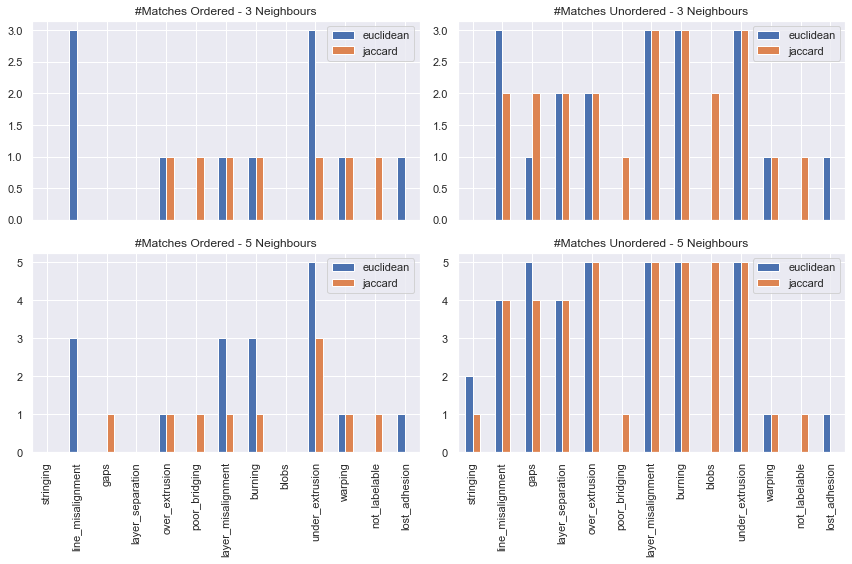

In [44]:
# ORDERED
fig, axes = plt.subplots(2,2, sharex=True, figsize=(12,8))
num_match_ord_3_head.plot(kind="bar", title="#Matches Ordered - 3 Neighbours", ax=axes[0][0])
num_match_urd_3_head.plot(kind="bar", title="#Matches Unordered - 3 Neighbours", ax=axes[0][1])
num_match_ord_5_head.plot(kind="bar", title="#Matches Ordered - 5 Neighbours", ax=axes[1][0])
num_match_urd_5_head.plot(kind="bar", title="#Matches Unordered - 5 Neighbours", ax=axes[1][1])
fig.tight_layout()
#plt.savefig('Barplot_Matches_all_influences_with_head.pdf')
plt.show()

In [45]:
%store num_match_ord_3_head
%store num_match_urd_3_head
%store num_match_ord_5_head
%store num_match_urd_5_head

Stored 'num_match_ord_3_head' (DataFrame)
Stored 'num_match_urd_3_head' (DataFrame)
Stored 'num_match_ord_5_head' (DataFrame)
Stored 'num_match_urd_5_head' (DataFrame)


In [46]:
num_match_ord_3_head

,euclidean,jaccard
stringing,0.0,0.0
line_misalignment,3.0,0.0
gaps,0.0,0.0
layer_separation,0.0,0.0
over_extrusion,1.0,1.0
poor_bridging,0.0,1.0
layer_misalignment,1.0,1.0
burning,1.0,1.0
blobs,0.0,0.0
under_extrusion,3.0,1.0


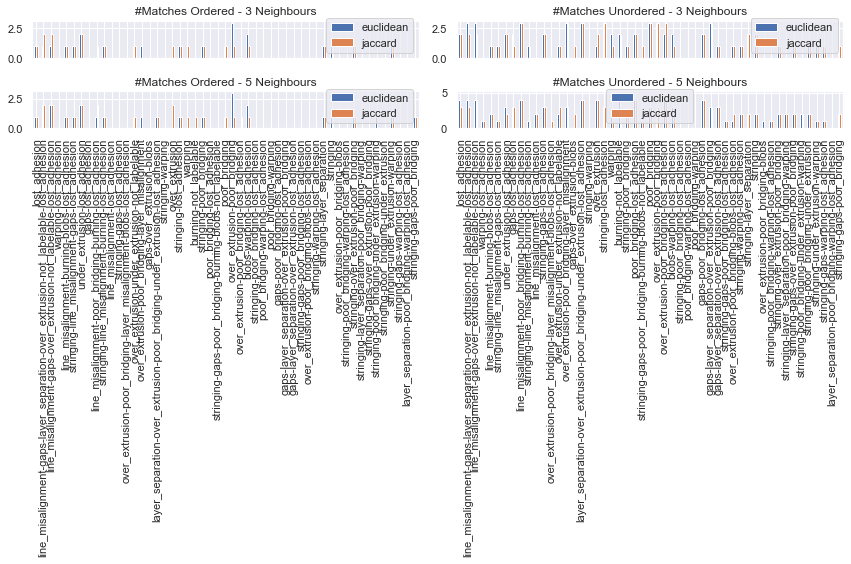

In [47]:
# Propagated
# ORDERED
fig_prop, axes_prop = plt.subplots(2,2, sharex=True, figsize=(12,8))
num_match_ord_3_prop.plot(kind="bar", title="#Matches Ordered - 3 Neighbours", ax=axes_prop[0][0])
num_match_urd_3_prop.plot(kind="bar", title="#Matches Unordered - 3 Neighbours", ax=axes_prop[0][1])
num_match_ord_5_prop.plot(kind="bar", title="#Matches Ordered - 5 Neighbours", ax=axes_prop[1][0])
num_match_urd_5_prop.plot(kind="bar", title="#Matches Unordered - 5 Neighbours", ax=axes_prop[1][1])
# fig.subplots_adjust(wspace=0.2)
# fig.subplots_adjust(hspace=0.2)
# plt.gcf().subplots_adjust(bottom=0.2)
fig_prop.tight_layout()
#plt.savefig('Barplot_Matches_all_influences_with_head_prop.pdf')
plt.show()

In [49]:
# ORDERED
ordered_match_table = pd.concat([num_match_ord_3_head.mean(), num_match_ord_3_head.mean() * 100 / 3, num_match_ord_3_head.median(), num_match_ord_5_head.mean(), num_match_ord_5_head.mean() * 100 / 5, num_match_ord_5_head.median()], axis=1)
ordered_match_table.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

# UNORDERED
unordered_match_table = pd.concat([num_match_urd_3_head.mean(), num_match_urd_3_head.mean() * 100 / 3, num_match_urd_3_head.median(), num_match_urd_5_head.mean(), num_match_urd_5_head.mean() * 100 / 5, num_match_urd_5_head.median()], axis=1)
unordered_match_table.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

concat_table = pd.concat([ordered_match_table, unordered_match_table], axis=0, keys=["Orderd", "Unordered"])
concat_table

Mean 3 Neighb.   % from 3  Median 3 Neighb.  \
Orderd    euclidean        0.846154  28.205128               1.0   
          jaccard          0.538462  17.948718               1.0   
Unordered euclidean        1.461538  48.717949               1.0   
          jaccard          1.692308  56.410256               2.0   

                     Mean 5 Neighb.   % from 5  Median 5 Neighb.  
Orderd    euclidean        1.307692  26.153846               1.0  
          jaccard          0.769231  15.384615               1.0  
Unordered euclidean        2.846154  56.923077               4.0  
          jaccard          3.153846  63.076923               4.0

In [50]:
# Propagated
# ORDERED
ordered_match_table_prop = pd.concat([num_match_ord_3_prop.mean(), num_match_ord_3_prop.mean() * 100 / 3, num_match_ord_3_prop.median(), num_match_ord_5_prop.mean(), num_match_ord_5_prop.mean() * 100 / 5, num_match_ord_5_prop.median()], axis=1)
ordered_match_table_prop.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

# UNORDERED
unordered_match_table_prop = pd.concat([num_match_urd_3_prop.mean(), num_match_urd_3_prop.mean() * 100 / 3, num_match_urd_3_prop.median(), num_match_urd_5_prop.mean(), num_match_urd_5_prop.mean() * 100 / 5, num_match_urd_5_prop.median()], axis=1)
unordered_match_table_prop.set_axis(["Mean 3 Neighb.", "% from 3", "Median 3 Neighb.", "Mean 5 Neighb.", "% from 5", "Median 5 Neighb."], axis=1, inplace=True)

concat_table_prop = pd.concat([ordered_match_table_prop, unordered_match_table_prop], axis=0, keys=["Orderd", "Unordered"])
concat_table_prop

Mean 3 Neighb.   % from 3  Median 3 Neighb.  \
Orderd    euclidean        0.431373  14.379085               0.0   
          jaccard          0.450980  15.032680               0.0   
Unordered euclidean        1.294118  43.137255               1.0   
          jaccard          1.274510  42.483660               1.0   

                     Mean 5 Neighb.   % from 5  Median 5 Neighb.  
Orderd    euclidean        0.549020  10.980392               0.0  
          jaccard          0.568627  11.372549               0.0  
Unordered euclidean        2.117647  42.352941               2.0  
          jaccard          2.117647  42.352941               2.0

In [51]:
pd.concat([ordered_match_table_prop, unordered_match_table_prop], axis=1, keys=["Orderd", "Unordered"])

Orderd                                             \
          Mean 3 Neighb.   % from 3 Median 3 Neighb. Mean 5 Neighb.   
euclidean       0.431373  14.379085              0.0       0.549020   
jaccard         0.450980  15.032680              0.0       0.568627   

                                           Unordered             \
            % from 5 Median 5 Neighb. Mean 3 Neighb.   % from 3   
euclidean  10.980392              0.0       1.294118  43.137255   
jaccard    11.372549              0.0       1.274510  42.483660   

                                                                       
          Median 3 Neighb. Mean 5 Neighb.   % from 5 Median 5 Neighb.  
euclidean              1.0       2.117647  42.352941              2.0  
jaccard                1.0       2.117647  42.352941              2.0

In [52]:
pd.concat([ordered_match_table_prop, unordered_match_table_prop], axis=1, keys=["Orderd", "Unordered"])

Orderd                                             \
          Mean 3 Neighb.   % from 3 Median 3 Neighb. Mean 5 Neighb.   
euclidean       0.431373  14.379085              0.0       0.549020   
jaccard         0.450980  15.032680              0.0       0.568627   

                                           Unordered             \
            % from 5 Median 5 Neighb. Mean 3 Neighb.   % from 3   
euclidean  10.980392              0.0       1.294118  43.137255   
jaccard    11.372549              0.0       1.274510  42.483660   

                                                                       
          Median 3 Neighb. Mean 5 Neighb.   % from 5 Median 5 Neighb.  
euclidean              1.0       2.117647  42.352941              2.0  
jaccard                1.0       2.117647  42.352941              2.0

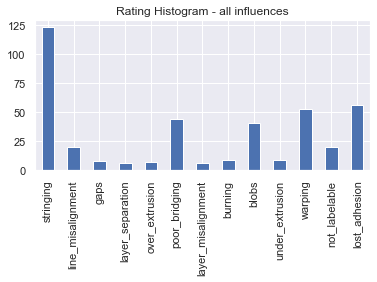

In [54]:
import pandas as pd

df = pd.read_csv("output.csv")  # csv from igraph.get_vertex_dataframe()
rating_values = df.loc[df['type'] != 'parameter'][['key', 'value']]
rating_histo = emb_eval_e.get_number_of_occurence(list(num_match_ord_euc_3.index), rating_values)
plot_title = "Rating Histogram - all influences"
# fig = plt.figure(figsize=(12,8))
rating_histo.plot(kind="bar", title=plot_title, legend=None)
fig.tight_layout()
plt.gcf().subplots_adjust(bottom=0.36)
# plt.savefig('Rating_Histogram_all_influences.pdf')

#### KDE Plots

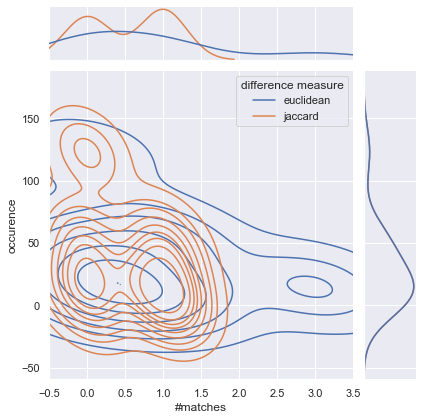

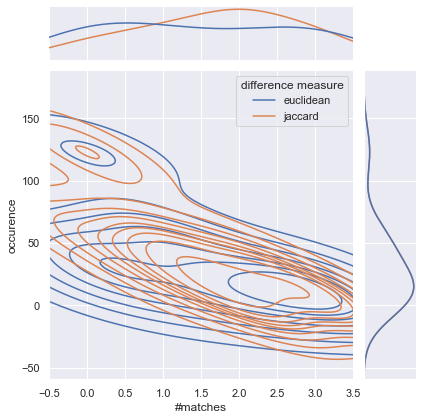

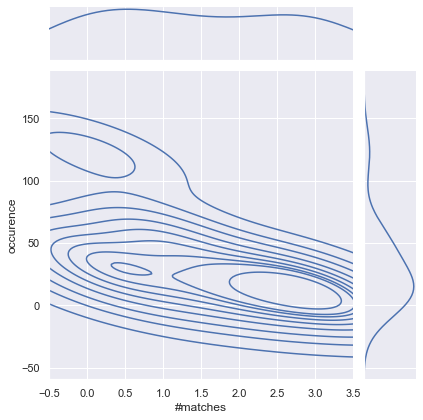

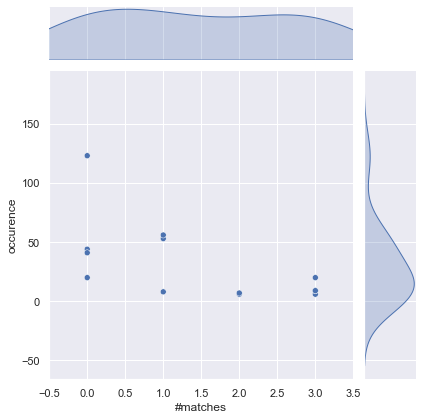

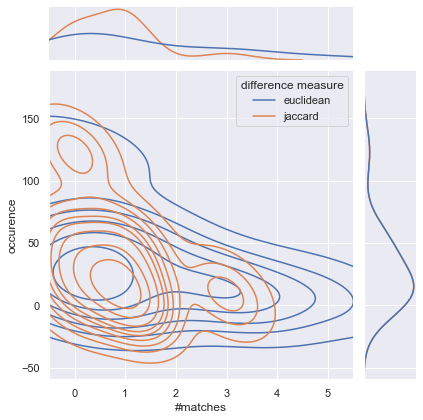

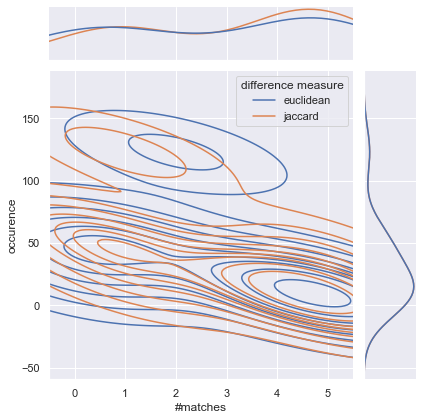

In [55]:
# ORDERED 3 Neighbours
num_match_ord_3_kde = pd.concat([num_match_ord_3_head, rating_histo], axis=1)
num_match_ord_3_kde_euc = num_match_ord_3_kde[['euclidean', 'occurence']]
num_match_ord_3_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_3_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_ord_3_kde_euc))]
num_match_ord_3_kde_jac = num_match_ord_3_kde[['jaccard', 'occurence']]
num_match_ord_3_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_3_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_ord_3_kde_jac))]
num_match_ord_3_kde_ej = pd.concat([num_match_ord_3_kde_euc, num_match_ord_3_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_ord_3_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), kind="kde")
# plt.savefig('KDEplot_Matches_Ord_3_Neigh_with_head.pdf')

# UNORDERED 3 Neighbours
num_match_urd_3_kde = pd.concat([num_match_urd_3_head, rating_histo], axis=1)
num_match_urd_3_kde_euc = num_match_urd_3_kde[['euclidean', 'occurence']]
num_match_urd_3_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_3_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_urd_3_kde_euc))]
num_match_urd_3_kde_jac = num_match_urd_3_kde[['jaccard', 'occurence']]
num_match_urd_3_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_3_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_urd_3_kde_jac))]
num_match_urd_3_kde_ej = pd.concat([num_match_urd_3_kde_euc, num_match_urd_3_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_urd_3_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), kind="kde")
sns.jointplot(data=num_match_urd_3_kde_euc, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), kind="kde", legend=False)
plt.savefig("KDEplot_num_match_urd_3_euc_nl_head.pdf")
sns.jointplot(data=num_match_urd_3_kde_euc, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 3.5), legend=False)
plt.savefig("KDEplot_num_match_urd_3_euc_points_nl_head.pdf")
# plt.savefig('KDEplot_Matches_Urd_3_Neigh_with_head.pdf')

# ORDERED 5 Neighbours
num_match_ord_5_kde = pd.concat([num_match_ord_5_head, rating_histo], axis=1)
num_match_ord_5_kde_euc = num_match_ord_5_kde[['euclidean', 'occurence']]
num_match_ord_5_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_5_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_ord_5_kde_euc))]
num_match_ord_5_kde_jac = num_match_ord_5_kde[['jaccard', 'occurence']]
num_match_ord_5_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_ord_5_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_ord_5_kde_jac))]
num_match_ord_5_kde_ej = pd.concat([num_match_ord_5_kde_euc, num_match_ord_5_kde_jac], axis=0, ignore_index=True)
sns.jointplot(data=num_match_ord_5_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 5.5), kind="kde")
# plt.savefig('KDEplot_Matches_Ord_5_Neigh_with_head.pdf')

# UNORDERED 5 Neighbours
num_match_urd_5_kde = pd.concat([num_match_urd_5_head, rating_histo], axis=1)
num_match_urd_5_kde_euc = num_match_urd_5_kde[['euclidean', 'occurence']]
num_match_urd_5_kde_euc.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_5_kde_euc['difference measure'] = ['euclidean' for _ in range(len(num_match_urd_5_kde_euc))]
num_match_urd_5_kde_jac = num_match_urd_5_kde[['jaccard', 'occurence']]
num_match_urd_5_kde_jac.set_axis(['#matches', 'occurence'], axis=1, inplace=True)
num_match_urd_5_kde_jac['difference measure'] = ['jaccard' for _ in range(len(num_match_urd_5_kde_jac))]
num_match_urd_5_kde_ej = pd.concat([num_match_urd_5_kde_euc, num_match_urd_5_kde_jac], axis=0, ignore_index=True)
sns.jointplot(ax=axes[1][1], data=num_match_urd_5_kde_ej, x="#matches", y='occurence', hue='difference measure', xlim=(-0.5, 5.5), kind="kde")
# plt.savefig('KDEplot_Matches_Urd_5_Neigh_with_head.pdf')